# Question 1:

### Part 1 - The equations:
By following the current loops using Faraday's law (or Kirchoff's loop rule for less excitement) we get the linear equation set:

<br>
$$
(R_1 + R_2 + r_2)I_2 + R_1 I_3 = V_1\\
R_1 I_2 + (R_1 + R_3 + r_3) I_3 = V_2 
$$
 <br>
 
Rewriting these using matrices:

$$
\begin{bmatrix}
(R_1 + R_2 + r_2)&R_1\\
R_1 & (R_1 + R_3 + r_3)
\end{bmatrix}
\begin{bmatrix}I_2\\I_3\end{bmatrix}
=\begin{pmatrix}V_1\\V_2\end{pmatrix}
$$
<br>
With the numerical values, that is:

$$
\begin{bmatrix}
(6 + 2.5 + 0.5)&6\\
6 & (6 + 1.5 + 0.5)
\end{bmatrix}
\begin{bmatrix}I_2\\I_3\end{bmatrix}
=\begin{pmatrix}18\\45\end{pmatrix}
$$
<br>

In [1]:
import numpy as np
coeffs = np.array([[6 + 2.5 + 0.5, 6], [6, 6 + 1.5 + 0.5]])
solns = np.array([18, 45])

### Part 2 - Solution using the inverse of the coefficients matrix:


$$ C \begin{bmatrix}I_2\\I_3\end{bmatrix} = \begin{pmatrix}V_1\\V_2\end{pmatrix}$$

$$ C^{-1}\,C \begin{bmatrix}I_2\\I_3\end{bmatrix} = C^{-1} \begin{pmatrix}V_1\\V_2\end{pmatrix}$$

$$ I\,\begin{bmatrix}I_2\\I_3\end{bmatrix} = C^{-1} \begin{pmatrix}V_1\\V_2\end{pmatrix}$$

$$ \begin{bmatrix}I_2\\I_3\end{bmatrix} = C^{-1} \begin{pmatrix}V_1\\V_2\end{pmatrix} $$
<br>

In [2]:
c_inv = np.linalg.inv(coeffs)
(I2, I3) = np.dot(c_inv, solns)
print(f"I2 = {I2}\nI3 = {I3}")
# np.linalg.solve(coeffs, solns) - just to check

I2 = -3.5
I3 = 8.25


### Part 3 - Solution using Cramer's rule:


<br>
$$
\begin{bmatrix}
c_{11} & c_{12}\\
c_{21} & c_{22}
\end{bmatrix}
\begin{bmatrix}I_2\\I_3\end{bmatrix}
=\begin{pmatrix}V_1\\V_2\end{pmatrix}
$$
<br>

<br>
$$
I_2 = \frac{det\begin{bmatrix} V_1 & c_{12}\\ V_2 & c_{22} \end{bmatrix}}{det\begin{bmatrix}
c_{11} & c_{12}\\
c_{21} & c_{22}
\end{bmatrix}},\; 
I_3 = \frac{det\begin{bmatrix} c_{11} & V_1\\ c_{21} & V_2 \end{bmatrix}}{det\begin{bmatrix}
c_{11} & c_{12}\\
c_{21} & c_{22}
\end{bmatrix}}
$$
<br>

In [3]:
cram1 = np.array([[18, 6], [45, 6 + 1.5 + 0.5]])
I1_c = np.linalg.det(cram1) / np.linalg.det(coeffs)

cram2 = np.array([[6 + 2.5 + 0.5, 18], [6, 45]])
I2_c = np.linalg.det(cram2) / np.linalg.det(coeffs)

print(f"I1 using Cramer's rule: {I1_c}\nI2 using Cramer's rule: {I2_c}")

I1 using Cramer's rule: -3.5
I2 using Cramer's rule: 8.250000000000002


### Part 4 - Solution using LU decomposition:
$$C \begin{bmatrix}I_2\\I_3\end{bmatrix} = \begin{pmatrix}V_1\\V_2\end{pmatrix}$$

<br>
$$ LU \begin{bmatrix}I_2\\I_3\end{bmatrix} = \begin{pmatrix}V_1\\V_2\end{pmatrix}$$

<br>
Here we rewrite $U \,\textbf{I}_{2,3}$ as $\textbf{z}$:

<br>
$$\textbf{z} = \begin{bmatrix} u_{11} & u_{12}\\0 & u_{22}\end{bmatrix}\begin{bmatrix}I_2\\I_3\end{bmatrix}$$

<br>
$$\begin{bmatrix}l_{11} & 0 \\ l_{21} & l_{22}\end{bmatrix}\begin{bmatrix}z_2\\z_3\end{bmatrix} = \begin{pmatrix}V_1\\V_2\end{pmatrix}$$

<br>
From here we get the equations:
<br>
$$
z_2 = \frac{V_1}{l_{11}}
$$

$$
l_{21}z_2 + l_{22}z_3 = V_2
$$

<br>
And:
<br>
$$\fbox{$z_2 = \frac{V_1}{l_{11}}$}$$
$$\fbox{$z_3 = l_{22} V_2- \frac{l_{21}}{l_{11}\,l_{22}} V_1$}$$

<br>
We can now use Scipy to start calculating:

In [4]:
import scipy.linalg as la

LU = la.lu(coeffs)
(I, L, U) = LU

# let's pull out the values we need:
(l11, l21, l22) = L[0][0], L[1][0], L[1][1]
V1, V2 = solns

z2 = V1/l11
z3 = l22*V2 - l21*V1 / (l11*l22)

print(f"z2 = {z2}\nz3 = {z3}")

z2 = 18.0
z3 = 33.0


Now that we know $z_2$ and $z_3$, we can calculate $I_2$ and $I_3$:

<br>
$$
\begin{bmatrix} u_{11} & u_{12}\\0 & u_{22}\end{bmatrix}\begin{bmatrix}I_2\\I_3\end{bmatrix} = \begin{bmatrix}z_2\\z_3\end{bmatrix}
$$
<br>

$$
I_3 = \frac{z_3}{u_{22}}
$$

$$
u_{11}\,I_2 + u_{12}\,I_3 = z_2
$$
<br>

$$\fbox{$I_3 = \frac{z_3}{u_{22}}$}$$
$$\fbox{$I_2 = \frac{z_2}{u_{11}} - \frac{u_{12}}{u_{11}\,u_{22}} z_3$}$$

In [5]:
(u11, u12, u22) = U[0][0], U[0][1], U[1][1]

I3_LU = z3/u22
I2_LU = z2/u11 - u12*z3 / (u11*u22)

print(f"LU decompostition result for I2: {I2}\nLU decompostition result for I3: {I3}")  # wohoo!

LU decompostition result for I2: -3.5
LU decompostition result for I3: 8.25


### Part 5 - New $V_1$, $V_2$ values:
$V_1$ = 30, $V_2$ = 15:

Yes, we definitely understand how convenient this is and are very satisfied :)

Again we can copy-paste our equations for $\textbf{z}$ and $\textbf{I}_{2,3}$, because the L and U values all stay the same:

<br>
$$\fbox{$z_2 = \frac{V_1}{l_{11}}$}$$
$$\fbox{$z_3 = l_{22} V_2- \frac{l_{21}}{l_{11}\,l_{22}} V_1$}$$



$$\fbox{$I_3 = \frac{z_3}{u_{22}}$}$$
$$\fbox{$I_2 = \frac{z_2}{u_{11}} - \frac{u_{12}}{u_{11}\,u_{22}} z_3$}$$

In [6]:
V1_5, V2_5 = 30, 15

z2_5 = V1_5/l11
z3_5 = l22*V2_5 - l21*V1_5 / (l11*l22)

I3_5 = z3_5/u22
I2_5 = z2_5/u11 - u12*z3_5 / (u11*u22)

print(f"New LU result for I2: {I2_5}\nNew LU result for I3: {I3_5}")

New LU result for I2: 4.166666666666667
New LU result for I3: -1.25




Let's also check that, using the `np.linalg.solve()` function:

In [7]:
coeffs = np.array([[6 + 2.5 + 0.5, 6], [6, 6 + 1.5 + 0.5]])
solns_5 = np.array([30, 15])

np.linalg.solve(coeffs, solns_5)

array([ 4.16666667, -1.25      ])

$\rightarrow$ All good, ours even has a higher precision 8)



# Question 2:

In [8]:
from PIL import Image
from resizeimage import resizeimage as rsi
# %pip install python-resize-image
# This module is to resize the images to %25, as requested.

# letting Pillow do its magic:
image = Image.open("data/Solvay_conference_1927.jpg")

# we can resize the original image to 25% and save it first:
rsi.resize_cover(image, [image.size[0]*0.4,image.size[1]*0.4]).save("100.jpg")

# letting Numpy do its magic:
data = np.asarray(image)

# singular value decomposition for u,s and vh:
[u,s,vh]=np.linalg.svd(data)
total_sigma = np.sum(s)  # sum of the σ values to calculate the %

for x in (10,30,50,75,90,95):  # looping for the different desired x% values
    break_value = total_sigma*x/100
    tot_aux = 0
    
    for i in range(s.size):
        tot_aux += s[i]  # now we add the σ, until we reach the desired size
        if(tot_aux > break_value):
            print(f"Threshold for {x}%: {i}")
            break
        
    threshold = i
    decomposed_array = np.empty(data.shape)
    
    for i in range(threshold):
        # A = ((σ1*u1*v1)^T)+...+((σr*ur*vr)^T)
        decomposed_array += s[i]*np.dot(np.array([u[:,i]]).T,np.array([vh[i,:]])) 
    
    # letting Pillow do its magic again to undo Numpy's magic:
    image = Image.fromarray(decomposed_array)
    
    # translating color scale to gray:
    image = image.convert("L")
    
    # resizing to %25:
    image=rsi.resize_cover(image, [image.size[0]*0.4,image.size[1]*0.4])
    image.save(str(x)+".jpg")

Threshold for 10%: 0
Threshold for 30%: 6
Threshold for 50%: 30
Threshold for 75%: 135
Threshold for 90%: 403
Threshold for 95%: 651


# Question 3:


In [9]:
import pandas as pd
import seaborn as sns

dinodf = pd.read_csv("data/data_dino.csv").set_index("x")
stardf = pd.read_csv("data/data_star.csv").set_index("x")

$$
V_y = \frac{\sum(y_i-\overline{y})^2}{n-1}
$$

<br>

$$
V_{yx} = \frac{\sum(y_i-\overline{y})(x_i - \overline{x})}{n-1}
$$

We need a handful of different residual sum values to plug into these equations, we can neatly calculate them in a compact for loop:

### Dino Dataset:


Mean of the x values in the Dino Dataset: 54.26327323943662
Mean of the y values in the Dino Dataset: 47.832252816901416

Variance of the x values in the Dino dataset: 281.0699875917608
Variance of the y values in the Dino dataset: 725.5159610042117

Covariance of the x and y values in the Dino dataset: -29.113932673470174


Datasaurus, roooar!




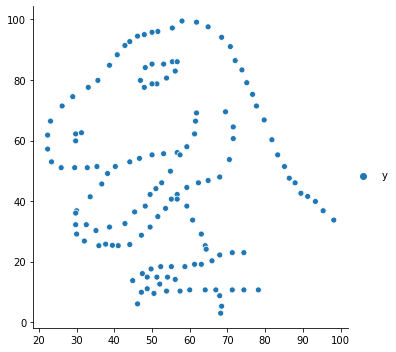

In [10]:
dinoy = dinodf["y"].values
dino_ymean = np.sum(dinodf["y"].values) / len(dinoy)

dinox = dinodf.index.values
dino_xmean = np.sum(dinox) / len(dinox)

st_x = 0
st_y = 0
st_xy = 0

for i in range(len(dinoy)):
    
    st_x += (dinox[i] - dino_xmean)**2
    st_y += (dinoy[i] - dino_ymean)**2
    st_xy += (dinox[i] - dino_xmean) * (dinoy[i] - dino_ymean)
    
var_dinox = st_x / (len(dinox) - 1)
var_dinoy = st_y / (len(dinoy) - 1)
covar_dino = st_xy / (len(dinoy) - 1)

print(f"\nMean of the x values in the Dino Dataset: {dino_xmean}")
print(f"Mean of the y values in the Dino Dataset: {dino_ymean}\n")

print(f"Variance of the x values in the Dino dataset: {var_dinox}")
print(f"Variance of the y values in the Dino dataset: {var_dinoy}\n")

print(f"Covariance of the x and y values in the Dino dataset: {covar_dino}\n\n\nDatasaurus, roooar!\n\n")
dino_plot = sns.relplot(data=dinodf)

### Star Dataset:


Mean of the x values in the Star Dataset: 54.26734110449506
Mean of the y values in the Star Dataset: 47.839545225097886

Variance of the x values in the Star dataset: 281.1979931971459
Variance of the y values in the Star dataset: 725.2396947522021

Covariance of the x and y values in the Star dataset: -28.43277185623957


The plot of a true star:




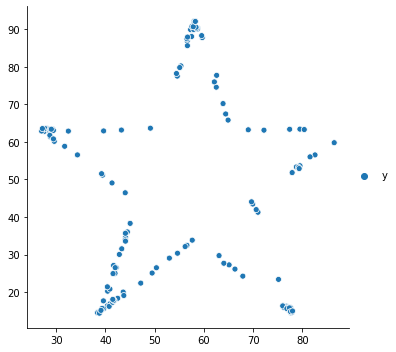

In [11]:
stary = stardf["y"].values
star_ymean = np.sum(stary) / len(stary)

starx = stardf.index.values
star_xmean = np.sum(starx) / len(starx)

st_x = 0
st_y = 0
st_xy = 0

for i in range(len(dinoy)):
    
    st_x += (starx[i] - star_xmean)**2
    st_y += (stary[i] - star_ymean)**2
    st_xy += (starx[i] - star_xmean) * (stary[i] - star_ymean)
    
var_starx = st_x / (len(starx) - 1)
var_stary = st_y / (len(stary) - 1)
covar_star = st_xy / (len(stary) - 1)

print(f"\nMean of the x values in the Star Dataset: {star_xmean}")
print(f"Mean of the y values in the Star Dataset: {star_ymean}\n")

print(f"Variance of the x values in the Star dataset: {var_starx}")
print(f"Variance of the y values in the Star dataset: {var_stary}\n")

print(f"Covariance of the x and y values in the Star dataset: {covar_star}\n\n\nThe plot of a true star:\n\n")

star_plot = sns.relplot(data=stardf)

The values we have reached are remarkably close to eachother. This very practically demonstrates that in our universe, all stars, all life, and all graphs are made of the same building blocks, and perhaps the universe itself cannot even distinguish them from eachother. They are all stardust 8)!

More mathematically speaking, this is a great demonstration of what our course is all about, it proves that our efforts of fitting curves onto datasets were never in vain, as we see two rather different shapes come out to have the same results from basic statistical analyses. A proper double-edged sword, it also shows that we cannot simply relly on statistics to know if our model has fit enough, it can only take us so far. Even if it numerically behaves so right in some values and in general, we have no guarantees that it will behave always. We can be snuck onto from all directions, so we need to use our heads. We see now, just how much data visualization helps with that, a visual guide lets us see the big picture of what is actually going on, shows us the parts we may have missed, and others that we did not even come close to guessing. -- And at least guarantees that we will be able to distinguish the data of a dinosaur from that of a star.

## References:


- Riley, Hobson, Bence - Mathematical Methods for Physics and Engineering 3rd Edition:
    - Chapter 31 - Statistics
    - Chapter 8 - Matrices and Vector Spaces
    

- Chapra, Canale - Numerical Methods for Engineers 7th Edition:
    - Chapter 5 - Curve Fitting (the statistical parts)
    
    
- Khan Academy - Course on Probabilty and Statistics
    - Variance, Covariance
    - Link to course: https://www.khanacademy.org/math/statistics-probability
    

- MIT OCW - 18.06 by Prof. Gilbert Strang:
    - Lectures on LU Decomposition, SVD
    - Link to playlist: https://www.youtube.com/playlist?list=PLE7DDD91010BC51F8
    
    
- Walter Lewin Lectures on Physics; 8.02:
    - Basic Circuit Analysis (yeah we actually had to look... )
    - Link to lecture: https://www.youtube.com/watch?v=ViwSDL657L4&t=2440s
    
    
- Justin Matejka, George Fitzmaurice: Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing:

    - https://www.autodesk.com/research/publications/same-stats-different-graphs